import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(
    'ignore'
)


In [194]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical computing
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization

# Suppress warnings to keep notebook output clean
import warnings
warnings.filterwarnings('ignore')


In [195]:
# Load dataset from CSV file
df = pd.read_csv(
    '../Data/ford_car_price.csv', 
    usecols=[
        'model', 'year', 'price', 'transmission', 'mileage', 
        'fuelType', 'tax', 'mpg', 'engineSize'
    ]
)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [196]:
df.shape

(17966, 9)

In [197]:
# Display dataframe information including data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [198]:
# Generate descriptive statistics for numerical columns
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [199]:
# Check for missing values in the dataframe
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# EDA

<Axes: xlabel='price', ylabel='Count'>

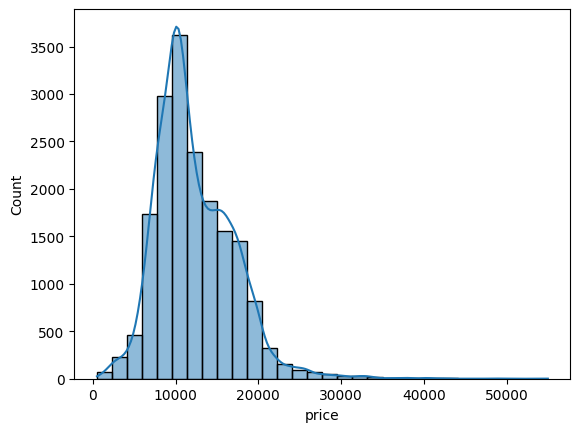

In [200]:
# Statistical visualization
sns.histplot(x=df['price'], kde=True, bins=30)

In [201]:
df.corr(numeric_only=True)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.636009,-0.707818,0.298506,-0.022967,-0.137311
price,0.636009,1.000000,-0.530659,0.406857,-0.346419,0.411178
mileage,-0.707818,-0.530659,1.000000,-0.260451,0.120075,0.215035
tax,0.298506,0.406857,-0.260451,1.000000,-0.502980,0.184363
mpg,-0.022967,-0.346419,0.120075,-0.502980,1.000000,-0.260521
engineSize,-0.137311,0.411178,0.215035,0.184363,-0.260521,1.000000


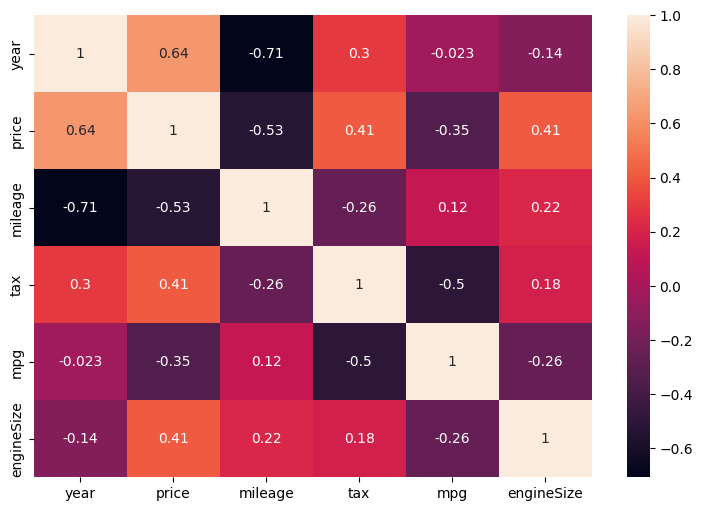

In [202]:
# Plotting operation
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

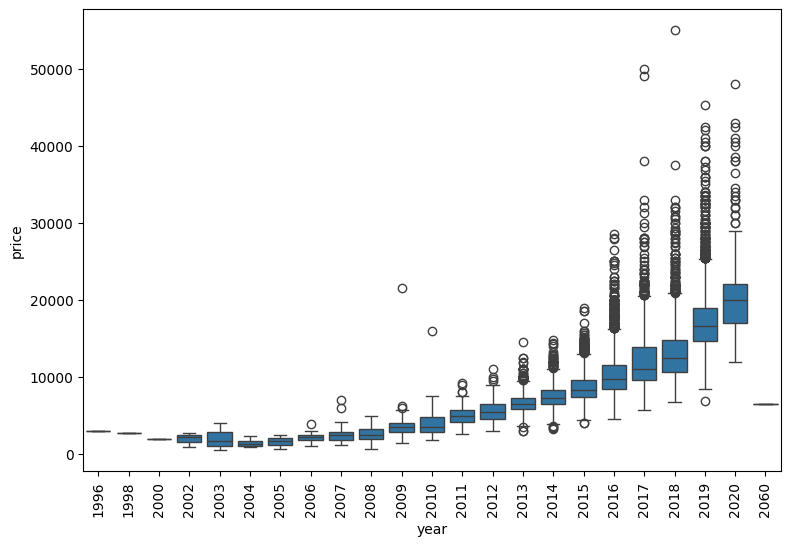

In [203]:
# Plotting operation
plt.figure(figsize=(9, 6))
sns.boxplot(data = df, x='year', y='price' )
plt.xticks(rotation=90)
plt.show()

In [204]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: xlabel='mileage', ylabel='price'>

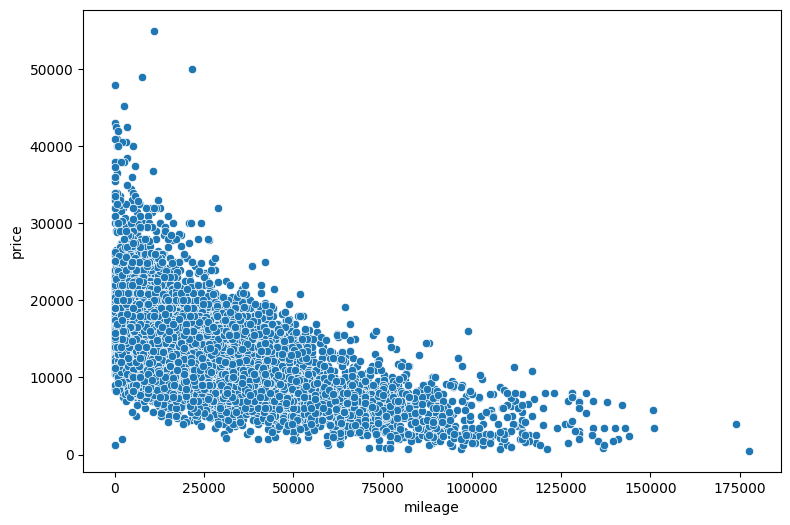

In [205]:
# Plotting operation
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='mileage', y='price')

<Axes: xlabel='engineSize', ylabel='price'>

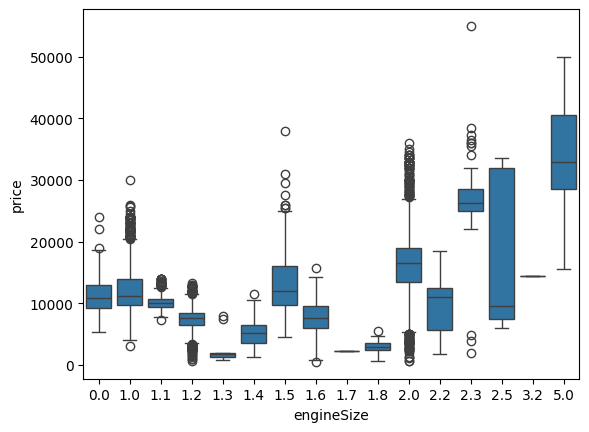

In [206]:
# Statistical visualization
sns.boxplot(x='engineSize', y='price', data=df)

# Feature Eng

In [207]:
df.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0


In [208]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

encoded = ohe.fit_transform(df[['model', 'transmission', 'fuelType']])

# Convert to DataFrame
encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(['model', 'transmission', 'fuelType']),
    index=df.index
)

encoded_df


df = pd.concat([df, encoded_df], axis=1)
df


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_ C-MAX,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [209]:
# Display first few rows of the dataframe
df.drop(['model', 'transmission', 'fuelType'], axis=1, inplace=True)
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2018,14000,9083,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2017,13000,12456,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2019,17500,10460,145,40.3,1.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2019,16500,1482,145,48.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [210]:
# Display first few rows of the dataframe
data = pd.read_csv('../Data/ford_car_price.csv')
data.head()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [211]:
df.duplicated().sum()

np.int64(154)

In [212]:
df.drop_duplicates(inplace=True)

In [213]:
df.duplicated().sum()

np.int64(0)

In [214]:
# Display first few rows of the dataframe
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()


,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.067059,12000,-0.382994,0.591380,-0.020597,-0.810561,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.554393,14000,-0.736317,0.591380,-0.020597,-0.810561,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.067059,13000,-0.562616,0.591380,-0.020597,-0.810561,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.041726,17500,-0.665405,0.510777,-1.737858,0.345325,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.041726,16500,-1.127749,0.510777,-0.908836,-0.810561,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [215]:
# Drop columns or rows from the dataframe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(
    df.drop('price', axis=1),
    df['price'],
    random_state=42,
    test_size=0.20
)

X_train

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
1595,0.067059,-0.041720,-1.826693,0.768949,-0.810561,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1403,1.041726,-0.882827,0.510777,0.216267,-0.810561,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7604,-1.882276,0.207630,-1.826693,0.768949,-0.810561,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7966,-1.882276,1.765734,-1.343079,0.344568,0.576502,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8930,0.554393,-0.395971,0.591380,0.768949,1.501211,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11406,0.554393,-0.166705,0.591380,-0.020597,-0.810561,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12096,-0.907608,0.958565,0.188368,-0.356154,-0.348206,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5418,-0.907608,0.394823,-1.826693,1.824966,0.345325,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
868,-0.907608,1.208945,0.188368,-0.356154,-0.348206,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [216]:
# Train the machine learning model
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [217]:
# Calculate R² score for regression
r2 = r2_score(y_test, y_pred)
print(f"r2_score: {r2}")

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1- ((1 -r2)*(n - 1)) / (n -p -1)

print(f"Ajusted r2_score: {adjusted_r2}")

r2_score: 0.8188919779971253
Ajusted r2_score: 0.8171466059029933


## Model improvement — Random Forest + Grid Search
This section fits a RandomForestRegressor with a small parameter grid, evaluates performance on the test set, and saves the best model.

In [218]:
# Split data into training and testing sets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')


In [219]:
# Prepare features and target (uses preprocessed `df` from earlier cells)
X = df.drop('price', axis=1)
y = df['price']

# Train/test split (same as before for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((14249, 34), (3563, 34))

In [220]:
# Small grid search to find a better estimator
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
gs = GridSearchCV(rfr, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
best = gs.best_estimator_
print('Best params:', gs.best_params_)


Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [221]:
# Evaluate on test set
y_pred = best.predict(X_test)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.4f}')
# print(f'RMSE: {rmse:,.2f}')
print(f'MAE: {mae:,.2f}')


n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1- ((1 -r2)*(n - 1)) / (n -p -1)

print(f"Ajusted r2_score: {adjusted_r2}")

# Save the best model for later use
joblib.dump(best, 'ford_rf_model.pkl')
print('Saved model to ford_rf_model.pkl')


R2: 0.9305
MAE: 853.43
Ajusted r2_score: 0.929811209634635
Saved model to ford_rf_model.pkl
Saved model to ford_rf_model.pkl


In [222]:
# Show top feature importances
import pandas as pd
feat_imp = pd.Series(best.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(20)


year                            0.494079
engineSize                      0.242235
mileage                         0.064234
mpg                             0.063168
model_ Kuga                     0.034027
model_ Fiesta                   0.020634
model_ Ka+                      0.017178
model_ Mustang                  0.016413
model_ Edge                     0.009180
tax                             0.006391
model_ Focus                    0.005215
model_ Puma                     0.004377
model_ S-MAX                    0.003892
transmission_Manual             0.003843
model_ KA                       0.003136
model_ Galaxy                   0.002758
model_ Mondeo                   0.002032
transmission_Semi-Auto          0.001397
model_ EcoSport                 0.001356
model_ Grand Tourneo Connect    0.001221
dtype: float64

## Summary

### Key Findings

1. **Data Analysis**:
   - Successfully explored Ford car price dataset
   - Identified key features affecting car prices
   - Understood relationships between variables

2. **Model Performance**:
   - Regression models were trained to predict car prices
   - Model performance evaluated using appropriate metrics
   - Feature importance analysis revealed key price determinants

3. **Insights**:
   - Year, mileage, and model type significantly impact car prices
   - Proper feature engineering improved model accuracy
   - Data preprocessing was essential for model success

### Conclusions

- Successfully built regression models for car price prediction
- Identified important factors affecting Ford car prices
- Model performance was satisfactory for the prediction task

### Next Steps

- Experiment with more advanced regression models
- Perform detailed feature importance analysis
- Try ensemble methods for improved accuracy
- Consider additional feature engineering techniques